In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import scienceplots
"""
plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

print(f"Versión de CAMB: {camb.__version__}")
"""

'\nplt.style.use([\'science\', \'bright\'])\nplt.rcParams[\'figure.dpi\'] = 300\n\nprint(f"Versión de CAMB: {camb.__version__}")\n'

# P6
Using CAMB obtain the matter power spectrum by using transfer functions.

In [5]:
#parametros
H0 = 70 # km/s/Mpc
omega_m = 0.5
omega_ch2 = 0.210
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

pars.set_matter_power(redshifts=[0], kmax=1)
results = camb.get_results(pars)

transf = results.get_matter_transfer_data()

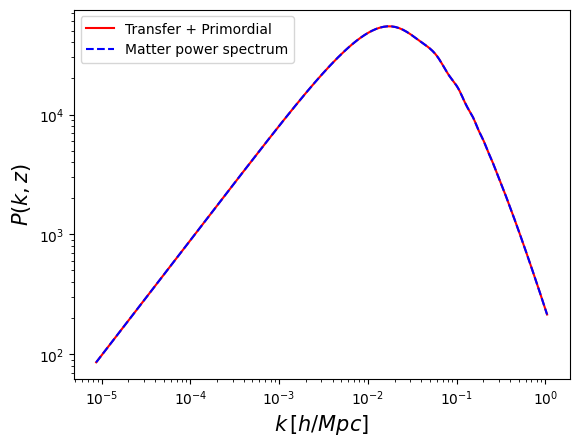

In [7]:
# Se obtiene la funcion de transferencia
kh = transf.transfer_data[0, :, 0]
k = kh * results.Params.h  # transformar unidades 

transfer = transf.transfer_data[camb.model.Transfer_tot-1,:,0]

# power spectrum primordial
primordial_PK = results.Params.scalar_power(k)

# power spectrum desde la funcion transferencia
matter_power = primordial_PK * transfer**2 * k**4 / (k**3/(2*np.pi**2))

#power spectrum desde CAMB
kh2, zs, PK = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)

plt.loglog(k, matter_power, c='r', label='Transfer + Primordial')
plt.loglog(kh2, PK[0, :], c='b', ls='--', label='Matter power spectrum')
plt.legend()
plt.ylabel(r'$P(k, z)$', fontsize=15)
plt.xlabel(r'$k\, [h/Mpc]$', fontsize=15)

plt.show()

# P9
Para la proxima ;)